<a href="https://colab.research.google.com/github/Manas-arora/deep-learning/blob/main/dl_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
print("LOADING YOLO")
net = cv2.dnn.readNet("/content/yolov3.weights", "/content/yolov3 (1).cfg")


LOADING YOLO


In [ ]:
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]


In [ ]:
layer_names = net.getLayerNames()

In [ ]:
# Get the names of all layers in the network
layer_names = net.getLayerNames()

# Get the output layer names where YOLO makes predictions
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

print("YOLO LOADED")


YOLO LOADED


Input Image:


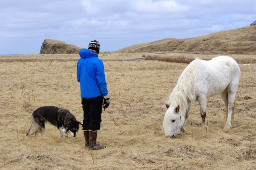

In [ ]:
# Read the image from a file
img = cv2.imread("pic1.jpg")

# Check if the image was loaded correctly
if img is None:
    print("Error: Could not read image file.")
else:
    # Resize the image to 40% of its original size (both width and height)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)

    # Get the dimensions of the image: height, width, and the number of channels (e.g., RGB)
    height, width, channels = img.shape

    # Print a message and display the resized image
    print("Input Image:")
    cv2_imshow(img)

In [ ]:
blob = cv2.dnn.blobFromImage(img, 1 / 255.0, (416, 416), swapRB=True, crop=False)


In [ ]:
# Set the blob as the input to the network
net.setInput(blob)

# Perform a forward pass and get the output from the output layers
outs = net.forward(output_layers)


In [ ]:
class_ids = []
confidences = []
boxes = []

# Loop through each output layer's detection results
for out in outs:
    for detection in out:
        # The first 5 elements are the bounding box attributes and objectness score
        scores = detection[5:]  # The rest are class probabilities
        class_id = np.argmax(scores)  # Get the index of the class with the highest probability
        confidence = scores[class_id]  # Get the confidence for that class

        # Filter out weak predictions by setting a confidence threshold
        if confidence > 0.3:

            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Calculate the top-left corner of the bounding box
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            # Store the results: class ID, confidence, and bounding box coordinates
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])


In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.5, nms_threshold=0.4)

In [ ]:
# Generate random colors for each class
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Loop through each detected box
for i in range(len(boxes)):
    if i in indexes:  # Check if the current index is in the NMS indexes
        x, y, w, h = boxes[i]  # Get bounding box coordinates
        label = str(classes[class_ids[i]])  # Get class label
        color = colors[class_ids[i]]  # Assign color based on class ID

        # Draw the bounding box
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

        # Draw the label above the bounding box
        cv2.putText(img, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        # Print detected object information
        print(f"Detected object: {label}, confidence: {confidences[i]:.2f}, box: {x}, {y}, {w}, {h}")


Detected object: horse, confidence: 1.00, box: 159, 53, 84, 83
Detected object: dog, confidence: 0.98, box: 24, 104, 58, 35
Detected object: person, confidence: 1.00, box: 76, 36, 33, 113


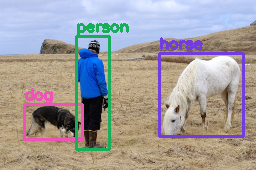

In [ ]:
cv2_imshow(img)